# In class exercise...Mutual Information 11.30.2020

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random


# also define the default font we'll use for figures. 
fig_font = {'fontname':'Arial', 'size':'20'}

## First load in our EEG data like last time...

In [2]:
# load the data...
eeg = np.load('/Users/t.z.cheng/Google_Drive/Coursework/PSYC231/python2020/class_notes_less_important/w9/eeg_data01.npz')

# get the different arrays like this...kind of like a structure in matlab. 
eeg['data']
eeg['sr']
eeg['tx']

# and can query the attributes of the data like this...which will tell us that there 1600 trials and 4102 timepoints per trial sampled
# at 1024Hz
print('Shape of the big eeg data set: ', eeg['data'].shape)
print('Sample rate: ', eeg['sr'])

# and if you want to save some typing, especially because we only have a few variables, you reassign the different arrays like this
data = eeg['data']
sr = eeg['sr']
tx = eeg['tx']

Shape of the big eeg data set:  (1600, 4102)
Sample rate:  1024


## Make a vector that labels each trial as coming from experimental conditions 1,2,3,4

In [3]:
N = data.shape[0]
num_samp_cond = int(N/4)
cond = np.hstack((np.ones(num_samp_cond), np.ones(num_samp_cond)*2, np.ones(num_samp_cond)*3, np.ones(num_samp_cond)*4))

In [4]:
np.shape(data)

(1600, 4102)

## Now avgerage the data from condition 2, avg the data from condition 3, and plot against the time axis (tx) - we're going to ignore conditions 1 and 4

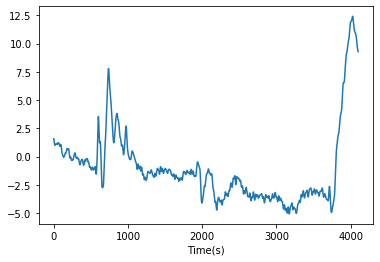

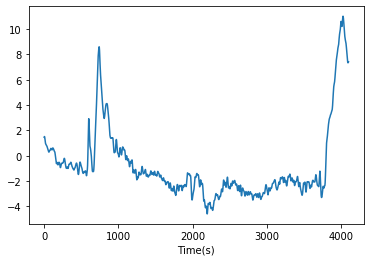

In [5]:
data2 = np.mean(data[cond == 2],axis = 0)
data3 = np.mean(data[cond == 3],axis = 0)
plt.plot(data2)
plt.xlabel("Time(s)")
plt.show()

plt.plot(data3)
plt.xlabel("Time(s)")
plt.show()

## Then compute the MI between evoked responses and experimental condition in a specific time window greater than or equal to 1000ms and less than 1500ms post-stimulus onset
* You have one discrete variable (cond, or experimental condition label)
* You have the EEG data from each condition, which is a continuous variable
* First compute the mean response across the time window for each trial of condition 2. This should give you a 400 element array with the mean from each trial across the time window. 
* Then compute the mean response across the time window for each trial of condition 3. 
* Then concatenate the two 400 element arrays to make one 800 element array
* You might also want to create a new set of labels for each trial in your new concatenated array - can relabel conds 2 and 3 with a 0 and 1 for ease of looping...
* Use only 10 bins for computing the pdfs...
* Then compute the MI between experimental condition and EEG responses on each trial!

In [6]:
# just for a demo, pick out a temporal window over which to average
t_win = data[:,(tx>=1000) & (tx<1500)]
# mean of 3rd dim (time)
data2 = np.mean(t_win[cond == 2], axis=1)
data3 = np.mean(t_win[cond == 3], axis=1)

In [7]:
cat23 = np.hstack([data2,data3])
labels = np.hstack([np.zeros(400),np.ones(400)])

## Now compute Hy...

In [8]:
# Compute Hy
nbins = 10
py, edges = np.histogram(cat23, bins = nbins)

py = py/np.sum(py)
Hy = -sum(py * np.log2(py))

print(Hy)

2.7318724527890335


## Now compute Hyx...

In [9]:
# Compute Hyx
px = 1/2 # 2 possibilities
ux = np.unique(labels)

Hyx = 0

for j in np.arange(len(ux)):
    # grab resp data from trials where x == j 
    y_x = cat23[labels == j]
    
    # hist 
    tmp_yx, edges = np.histogram(y_x, bins = nbins)
    
    # normalize to unit area to make PDF
    tmp_yx = tmp_yx/np.sum(tmp_yx)

    # Entropy of y given each specific x
    Hyx += px * (-sum(tmp_yx * np.log2(tmp_yx)))

print(Hyx)

2.746605841280951


## Now Compute MI - surprise??? What is weird about this?

In [10]:
realMI = Hy - Hyx
print(realMI)
print("It's negative")

NameError: name 'MI' is not defined

## Part II: Bias correction
* MI is biased in that small sample sizes lead to inaccurate estimates of PDFs, and that can sometimes lead to negative MI values (which should never happen in theory). 
* A common, and simple, approach, is to compute MI with shuffled condition labels (like randomization tests that we did many weeks back) and then subtract the shuffled MI from the actual MI. 

## Now repeat the above operations, but shuffle the condition label array and repeat the analysis many times (~500-1000 times). Plot the distribution of MI values that you get.

In [ ]:
labels = np.hstack([np.zeros(400),np.ones(400)])
np.random.shuffle(labels)

In [ ]:
# Compute Hy
nbins = 10
py, edges = np.histogram(cat23, bins = nbins)

py = py/np.sum(py)
Hy = -sum(py * np.log2(py))

print(Hy)

In [ ]:
# Compute Hyx
Hyx = 0

for j in np.arange(len(ux)):
    # grab resp data from trials where x == j 
    y_x = cat23[labels == j]
    
    # hist 
    tmp_yx, edges = np.histogram(y_x, bins = nbins)
    
    # normalize to unit area to make PDF
    tmp_yx = tmp_yx/np.sum(tmp_yx)

    # Entropy of y given each specific x
    Hyx += px * (-sum(tmp_yx * np.log2(tmp_yx)))

print(Hyx)

In [ ]:
MI = Hy - Hyx
print(MI)

## Now subtract the mean of the shuffled MI values from your 'real' MI value...this will help correct for any bias that is introduced by a limited sample size